In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter(action = "ignore")


In [ ]:
db=pd.read_csv("/content/diabetes.csv")
print(db)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
db.shape

(768, 9)

In [ ]:
db.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [ ]:
db["Outcome"].value_counts()*100/len(db)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [ ]:
db.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

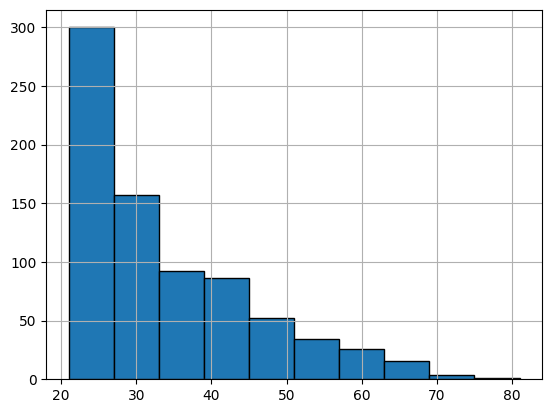

In [ ]:
db["Age"].hist(edgecolor = "black");

In [ ]:
print("Max Age: " + str(db["Age"].max()) + " Min Age: " + str(db["Age"].min()))

Max Age: 81 Min Age: 21


<Axes: xlabel='BMI', ylabel='Density'>

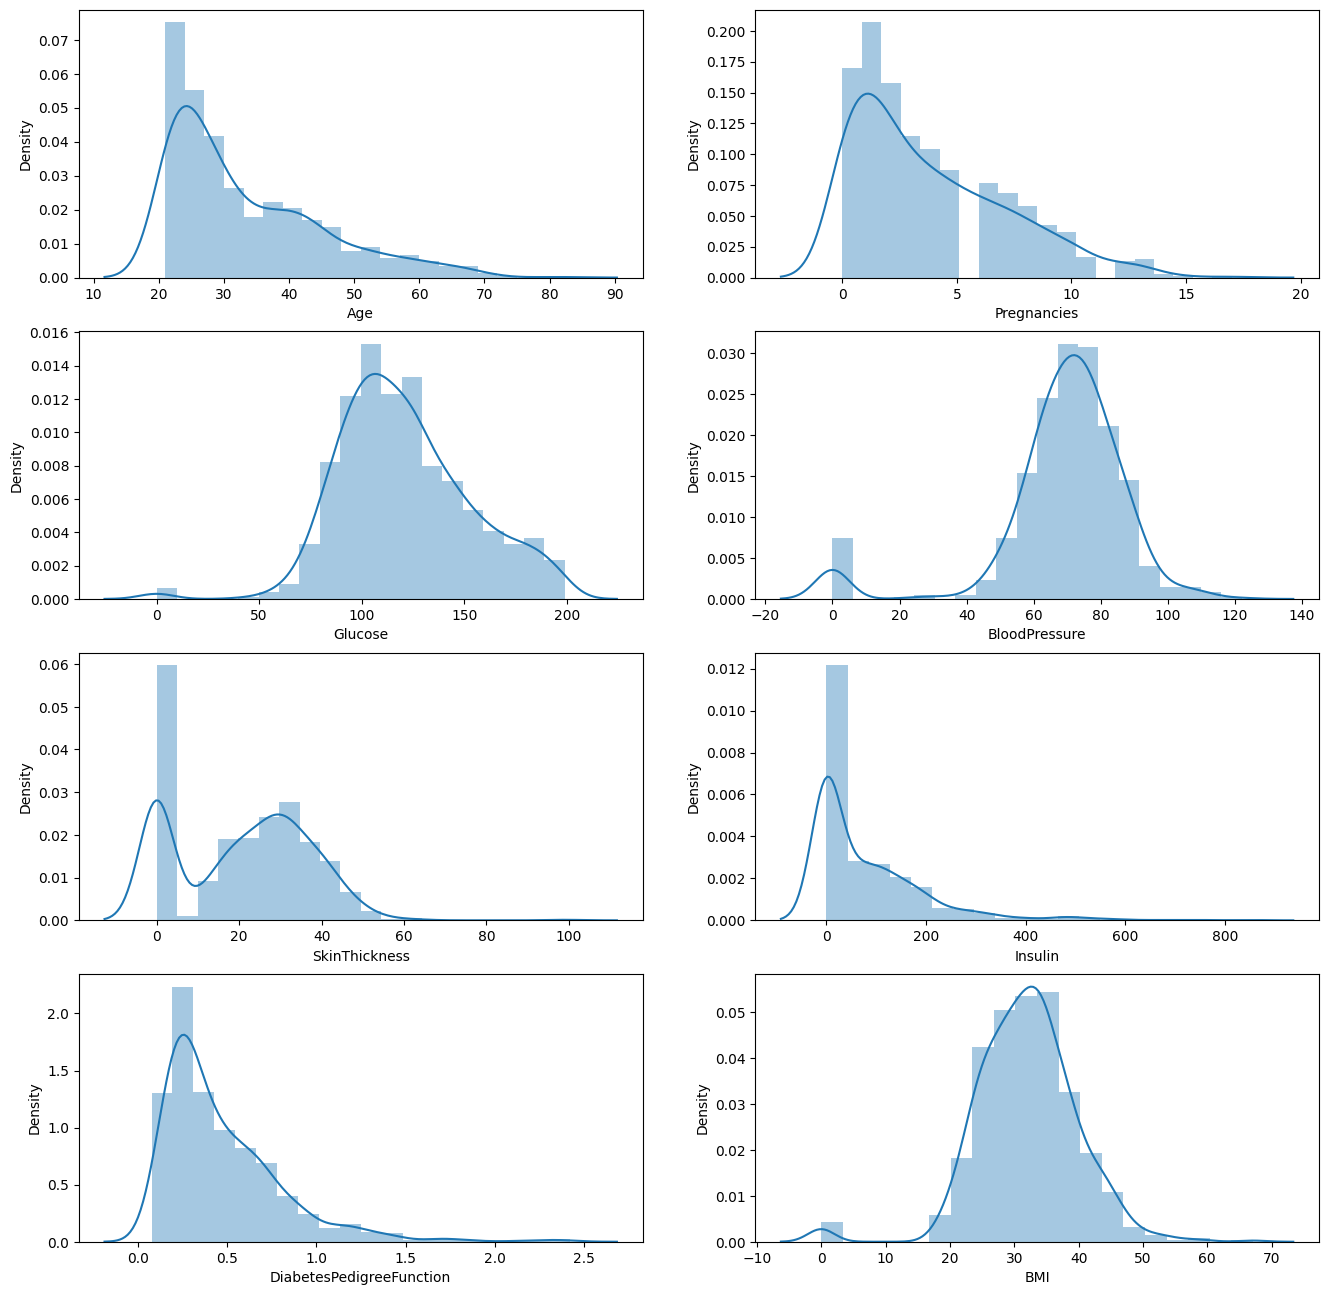

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(db.Age, bins = 20, ax=ax[0,0])
sns.distplot(db.Pregnancies, bins = 20, ax=ax[0,1])
sns.distplot(db.Glucose, bins = 20, ax=ax[1,0])
sns.distplot(db.BloodPressure, bins = 20, ax=ax[1,1])
sns.distplot(db.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(db.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(db.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.distplot(db.BMI, bins = 20, ax=ax[3,1])

In [ ]:
db.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [ ]:
db.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [ ]:
db.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [ ]:
db.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [ ]:
db.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


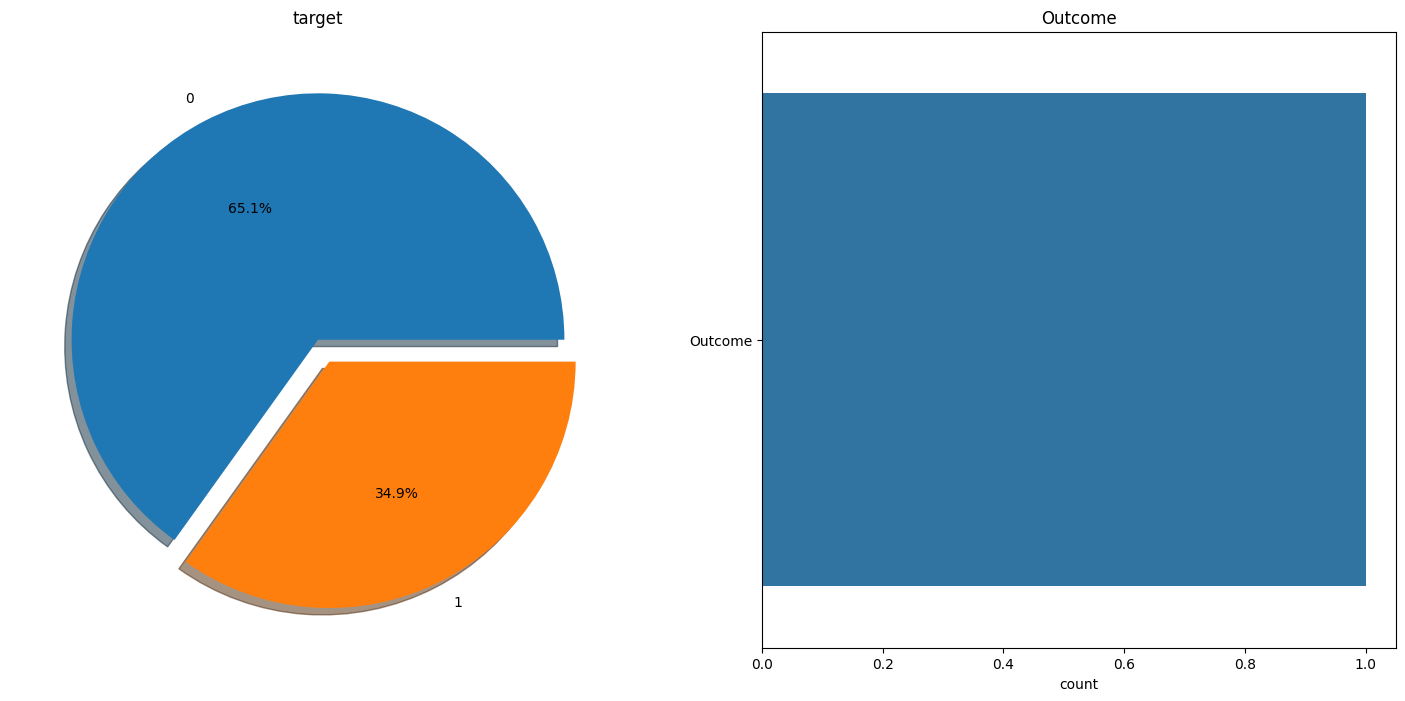

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
db['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Outcome', ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [ ]:
db.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


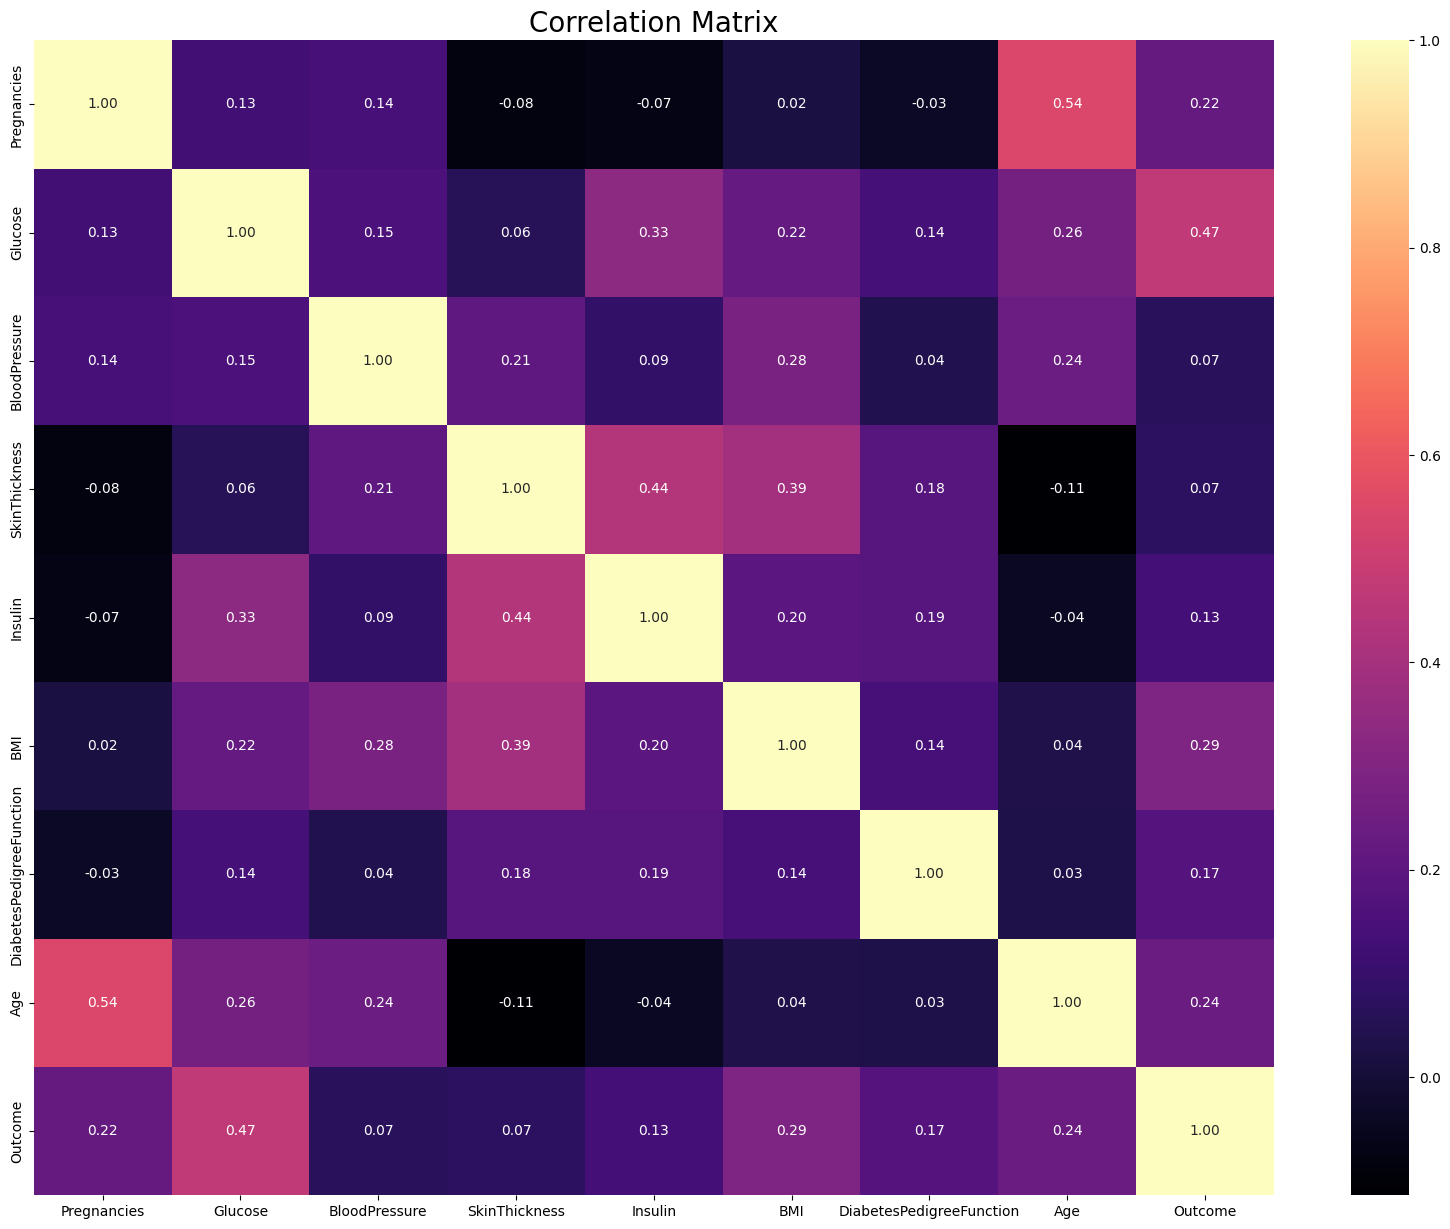

In [ ]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(db.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [ ]:
db[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = db[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [ ]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
db.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

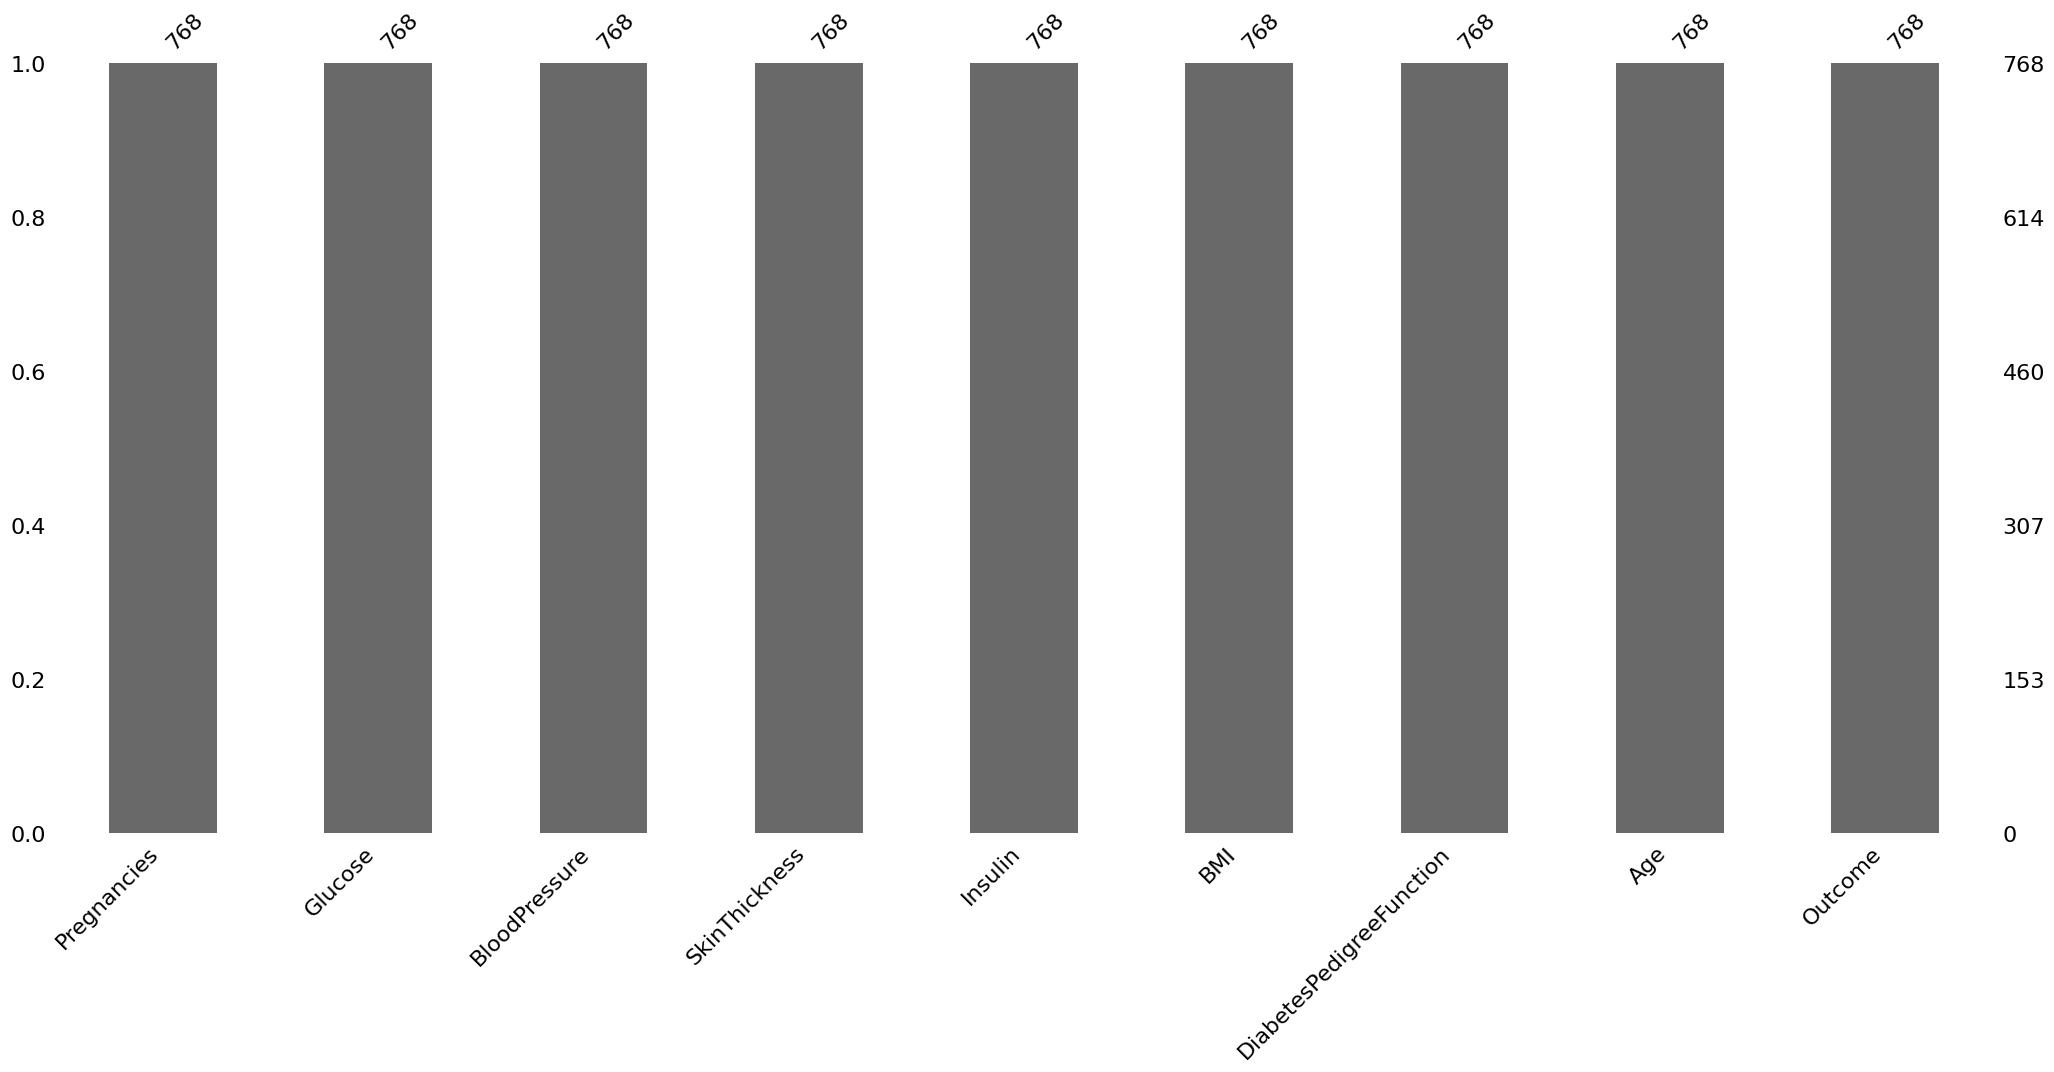

In [ ]:
import missingno as msno
msno.bar(db);
def median_target(var):
    temp = db[db[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

columns = db.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    db.loc[(db['Outcome'] == 0 ) & (db[i].isnull()), i] = median_target(i)[i][0]
    db.loc[(db['Outcome'] == 1 ) & (db[i].isnull()), i] = median_target(i)[i][1]
db.head()
db.isnull().sum()

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


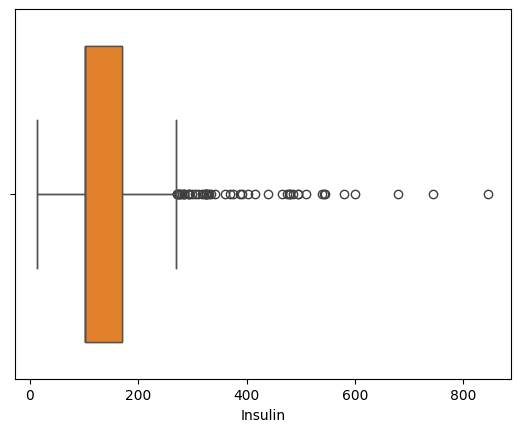

In [ ]:
for feature in db:

    Q1 = db[feature].quantile(0.25)
    Q3 = db[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if db[(db[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")
import seaborn as sns
sns.boxplot(x = db["Insulin"]);
Q1 = db.Insulin.quantile(0.25)
Q3 = db.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
db.loc[db["Insulin"] > upper,"Insulin"] = upper
import seaborn as sns
sns.boxplot(x = db["Insulin"]);

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(db)
db_scores = lof.negative_outlier_factor_
np.sort(db_scores)[0:30]
threshold = np.sort(db_scores)[7]
threshold
outlier = db_scores > threshold
db = db[outlier]

db.shape

(760, 9)

In [ ]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
db["NewBMI"] = NewBMI
db.loc[db["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
db.loc[(db["BMI"] > 18.5) & (db["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
db.loc[(db["BMI"] > 24.9) & (db["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
db.loc[(db["BMI"] > 29.9) & (db["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
db.loc[(db["BMI"] > 34.9) & (db["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
db.loc[db["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]
db.head()
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"
# The operation performed was added to the dataframe.
db = db.assign(NewInsulinScore=db.apply(set_insulin, axis=1))

db.head()
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
db["NewGlucose"] = NewGlucose
db.loc[db["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
db.loc[(db["Glucose"] > 70) & (db["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
db.loc[(db["Glucose"] > 99) & (db["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
db.loc[db["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


In [ ]:

categorical_db = db[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]
categorical_db.head()
y = db["Outcome"]
X = db.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
X_cols = X.columns
X_index = X.index
X.head()
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = X_cols, index = X_index)
X.head()
X = pd.concat([X,categorical_db], axis = 1)
X.head()
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

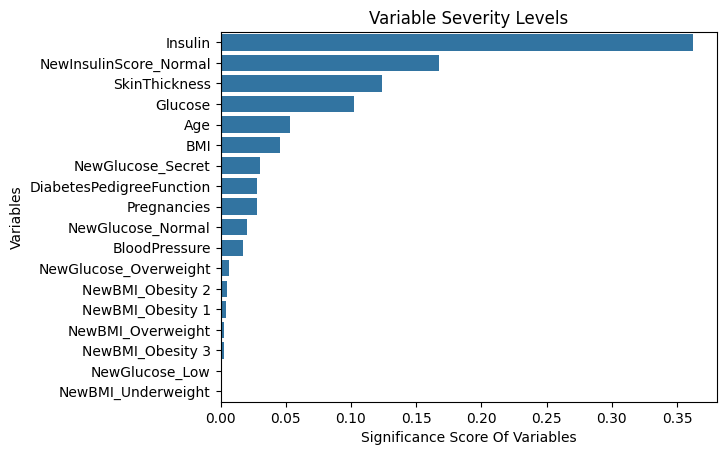

In [ ]:
rf_tuned = RandomForestClassifier()  # Use default parameters
# OR
rf_tuned = RandomForestClassifier(n_estimators=100, max_depth=5)  # Set specific parameters
rf_tuned = rf_tuned.fit(X,y)
# ... rest of your code
cross_val_score(rf_tuned, X, y, cv = 10).mean()
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()


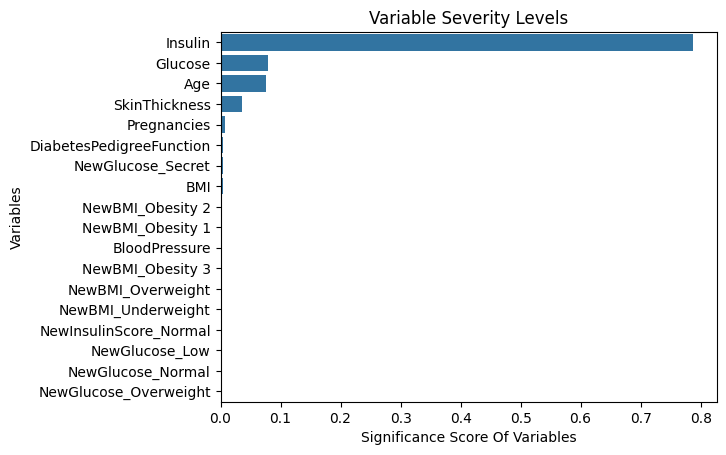

In [ ]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}


xgb = XGBClassifier()


xgb_cv_model = GridSearchCV(xgb, param_grid, cv=10, scoring='accuracy')
xgb_cv_model.fit(X, y)


xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(X, y)


cross_val_score(xgb_tuned, X, y, cv=10).mean()
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

RF: 0.897368 (0.034211)


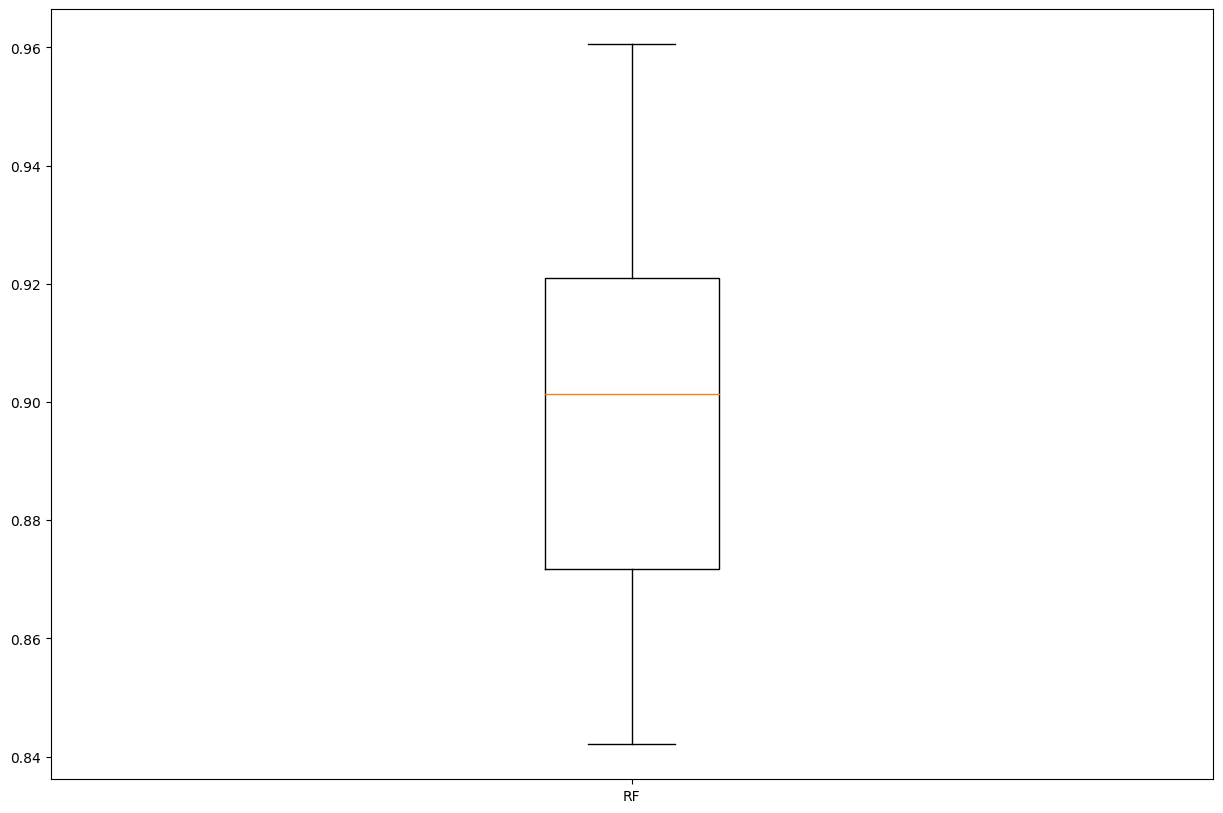

In [ ]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth = 8, max_features = 7, min_samples_split = 2, n_estimators = 500)))
results = []
names = []
for name, model in models:

        kfold = KFold(n_splits = 10, random_state = 12345, shuffle=True)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()